In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/Realtor Data.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [2]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [3]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0,No
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0,Yes
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0,Yes
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0,Yes


In [4]:
realtor_file_df.fillna(0,inplace=True)
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.00,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.00,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.00,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.00,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.00,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1117009,for_sale,0.0,1.0,0.00,New York,New York,11432.0,0.0,2015-04-09,150000.0,Yes
1117465,for_sale,4.0,3.0,0.00,New York,New York,11375.0,2200.0,2021-10-18,1825500.0,Yes
1117972,for_sale,1.0,1.0,0.00,New York,New York,11375.0,0.0,2006-09-13,350000.0,Yes
1118260,for_sale,4.0,3.0,0.00,New York,New York,11423.0,0.0,1987-06-12,990000.0,Yes


In [9]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,1.000000,1.000000,0.958649,0.606454,-0.156233
bath,1.000000,1.000000,1.000000,0.958663,0.606525,-0.156145
acre_lot,1.000000,1.000000,1.000000,0.958544,0.605914,-0.156903
zip_code,0.958649,0.958663,0.958544,1.000000,0.696498,-0.007438
house_size,0.606454,0.606525,0.605914,0.696498,1.000000,0.690572
price,-0.156233,-0.156145,-0.156903,-0.007438,0.690572,1.000000


What are the average real estate prices in New York over the last three years, broken down by both months and quarters?


In [5]:
# Convert 'prev_sold_date' to datetime and create a copy of the DataFrame
new_york_df = new_york_df.copy()
new_york_df['prev_sold_date'] = pd.to_datetime(new_york_df['prev_sold_date'])
new_york_df.loc[:, 'month'] = new_york_df['prev_sold_date'].dt.month
new_york_df.loc[:, 'quarter'] = new_york_df['prev_sold_date'].dt.quarter

# Add a 'year' column
new_york_df.loc[:, 'year'] = new_york_df['prev_sold_date'].dt.year

# Determine the range of years in your dataset
min_year = new_york_df['year'].min()
max_year = new_york_df['year'].max()

# Filter data for the last three years
last_three_years_data = new_york_df[new_york_df['year'].between(new_york_df['year'].max() - 2, new_york_df['year'].max())]

# Group by month and calculate the average price for the last three years
average_prices_monthly_last_three_years = last_three_years_data.groupby('month')['price'].mean().round()

# Group by quarter and calculate the average price for the last three years
average_prices_quarterly_last_three_years = last_three_years_data.groupby('quarter')['price'].mean().round()

# Print the results
print("Average Monthly Prices (Last Three Years):")
print(average_prices_monthly_last_three_years)

print("\nAverage Quarterly Prices (Last Three Years):")
print(average_prices_quarterly_last_three_years)


Average Monthly Prices (Last Three Years):
month
1     8389860.0
2     1904344.0
3     1878235.0
4     2412079.0
5     1668546.0
6     1092585.0
7     5182380.0
8     1652141.0
9      956630.0
10    2251355.0
11    1341836.0
12    1610229.0
Name: price, dtype: float64

Average Quarterly Prices (Last Three Years):
quarter
1    3871500.0
2    1462681.0
3    3005037.0
4    1898847.0
Name: price, dtype: float64


The bar charts visually represent the average real estate prices in New York over the last three years, providing insights into both monthly and quarterly trends.

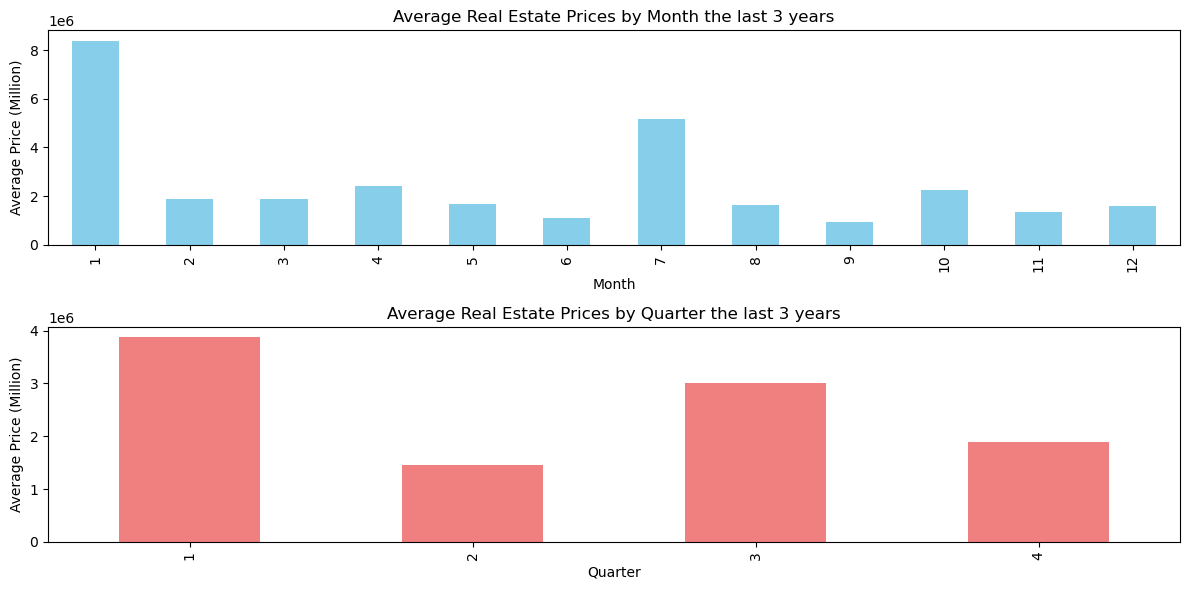

In [6]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting monthly average prices
plt.subplot(2, 1, 1)
average_prices_monthly_last_three_years.plot(kind='bar', color='skyblue')
plt.title('Average Real Estate Prices by Month the last 3 years')
plt.xlabel('Month')
plt.ylabel('Average Price (Million)')

# Plotting quarterly average prices
plt.subplot(2, 1, 2)
average_prices_quarterly_last_three_years.plot(kind='bar', color='lightcoral')
plt.title('Average Real Estate Prices by Quarter the last 3 years')
plt.xlabel('Quarter')
plt.ylabel('Average Price (Million)')

plt.tight_layout()
plt.show()


Visualizing Price Distributions (Last Three Years):

First Month: A sky-blue histogram illustrates the distribution of real estate prices in the first month, ranging from $390,000 to $3.5 million over the last three years. The spread and outliers suggest a diverse market.

First Quarter: In light coral, a histogram showcases the distribution of prices in the first quarter, revealing a range from $289,000 to $3.5 million. These visualizations provide insights into market dynamics, aiding in trend identification and outlier detection.

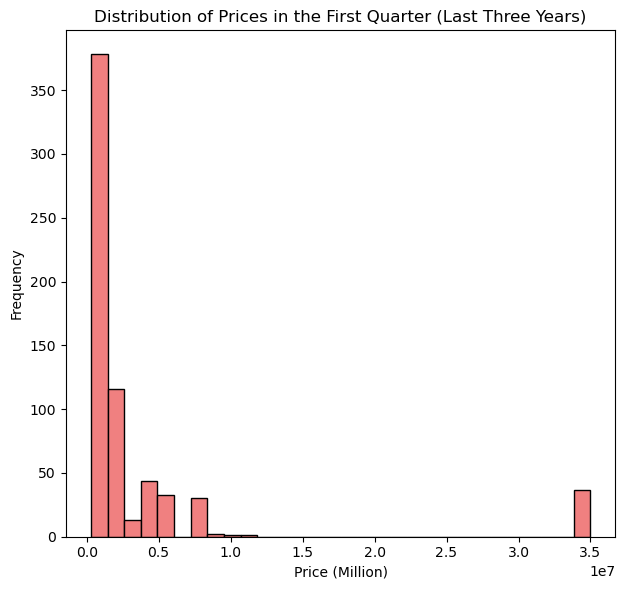

In [15]:
first_month_data_last_three_years = last_three_years_data[last_three_years_data['month'] == 1]
first_quarter_data_last_three_years = last_three_years_data[last_three_years_data['quarter'] == 1]

# Plot histograms for the distribution of prices in the last three years
plt.figure(figsize=(12, 6))



# Histogram for the first quarter in the last three years
plt.subplot(1, 2, 2)
plt.hist(first_quarter_data_last_three_years['price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Prices in the First Quarter (Last Three Years)')
plt.xlabel('Price (Million)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()